# Pre-procesamiento

El preprocesamiento de datos es el primer paso crucial en el desarrollo de un modelo de Machine Learning. Mejora la calidad de los datos y ayuda a obtener resultados más precisos y confiables.

### Limpieza de Datos
El proceso de detectar y corregir (o eliminar) errores y inconsistencias en los datos.

In [78]:
import pandas as pd

In [79]:
titanic_path = "../data/titanic.csv"
data = pd.read_csv(titanic_path)

# Mostrar las primeras filas del dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
# Eliminar duplicados
data = data.drop_duplicates()

# Mostrar información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Manejo de Valores Faltantes**

Métodos Comunes:
- Eliminación de filas/columnas con valores faltantes.
- Imputación (relleno) con la media, mediana o moda.
- Uso de modelos predictivos para imputar valores.

In [81]:
# Mostrar el número de valores faltantes por columna
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [82]:
# Eliminar filas con valores faltantes
data_cleaned = data.dropna()

In [83]:
# Imputar valores faltantes en la columna 'Age' con la media
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Imputar valores faltantes en la columna 'Fare' con la mediana
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [84]:
# Imputar valores faltantes en la columna 'Embarked' con la moda
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Imputar valores faltantes en la columna 'Cabin' con 'Unknown'
data['Cabin'] = data['Cabin'].fillna('Desconocido')

In [85]:
# Mostrar información del dataset después de la imputación
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Codificación de datos categóricos**

Transformar datos categóricos en un formato que puede ser proporcionado a los algoritmos de Machine Learning.

Métodos Comunes:
- One-Hot Encoding.
- Label Encoding.

In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Codificación de la columna 'Sex' utilizando Label Encoding
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [87]:
# Codificación de la columna 'Embarked' utilizando One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
embarked_encoded = onehot_encoder.fit_transform(data[['Embarked']])

# Convertir el array resultante a un DataFrame
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=onehot_encoder.get_feature_names_out(['Embarked']))

# Concatenar las columnas codificadas con el dataset original
data = pd.concat([data, embarked_encoded_df], axis=1)

# Eliminar la columna original 'Embarked'
data = data.drop('Embarked', axis=1)

In [88]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Desconocido,0.0,1.0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Desconocido,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Desconocido,0.0,1.0,0.0
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,Desconocido,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,Desconocido,0.0,0.0,1.0


In [89]:
# Codificación de la columna 'Pclass' utilizando One-Hot Encoding
pclass_encoded = onehot_encoder.fit_transform(data[['Pclass']])
pclass_encoded_df = pd.DataFrame(pclass_encoded, columns=onehot_encoder.get_feature_names_out(['Pclass']))
data = pd.concat([data, pclass_encoded_df], axis=1)
data = data.drop('Pclass', axis=1)

In [90]:
# Mostrar las primeras filas del dataset después de la codificación
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,0,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Desconocido,0.0,1.0,0.0,0.0,0.0,1.0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Desconocido,0.0,0.0,1.0,0.0,0.0,1.0
2,894,0,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Desconocido,0.0,1.0,0.0,0.0,1.0,0.0
3,895,0,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,Desconocido,0.0,0.0,1.0,0.0,0.0,1.0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,Desconocido,0.0,0.0,1.0,0.0,0.0,1.0


**Escalado de Características**

Normalización:

Ajustar los valores en una escala de 0 a 1.

Fórmula: 
$$ x' = \frac{x - \min(x)}{\max(x) - \min(x)} $$
​
 
Estandarización:

Ajustar los valores para que tengan una media de 0 y una desviación estándar de 1.

Fórmula: 
$$ z = \frac{x - \mu}{\sigma} $$


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

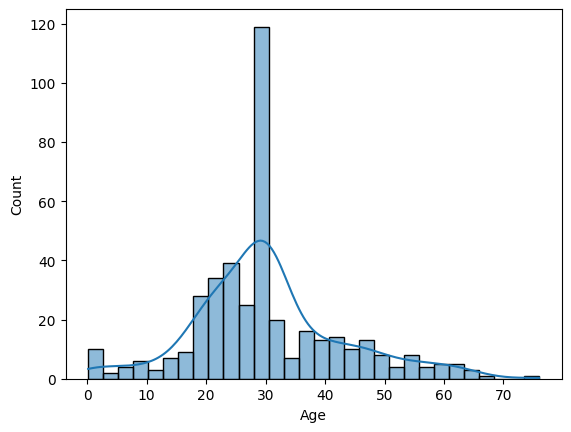

In [92]:
# Mostrar la distribución de la columna 'Age'
sns.histplot(data['Age'], bins=30, kde=True);

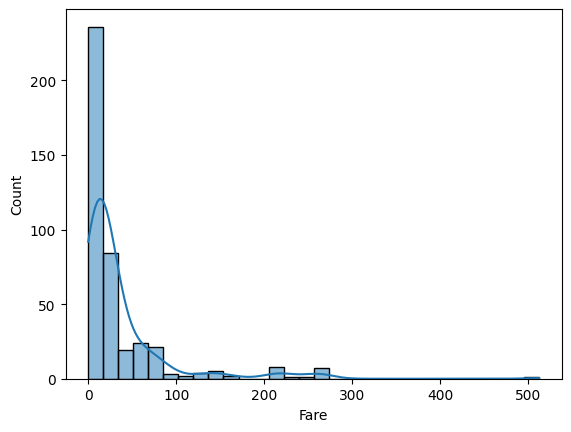

In [93]:
sns.histplot(data['Fare'], bins=30, kde=True);

In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar las características numéricas
numeric_features = ['Age', 'Fare']

In [95]:
data[numeric_features].describe()

,Age,Fare
count,418.000000,418.000000
mean,30.272590,35.576535
std,12.634534,55.850103
min,0.170000,0.000000
25%,23.000000,7.895800
50%,30.272590,14.454200
75%,35.750000,31.471875
max,76.000000,512.329200


In [96]:
# Normalización
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Estandarización
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Mostrar las primeras filas del dataset después del escalado
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,0,"Kelly, Mr. James",1,0.334993,0,0,330911,-0.497413,Desconocido,0.0,1.0,0.0,0.0,0.0,1.0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",0,1.325530,1,0,363272,-0.512278,Desconocido,0.0,0.0,1.0,0.0,0.0,1.0
2,894,0,"Myles, Mr. Thomas Francis",1,2.514175,0,0,240276,-0.464100,Desconocido,0.0,1.0,0.0,0.0,1.0,0.0
3,895,0,"Wirz, Mr. Albert",1,-0.259330,0,0,315154,-0.482475,Desconocido,0.0,0.0,1.0,0.0,0.0,1.0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,-0.655545,1,1,3101298,-0.417492,Desconocido,0.0,0.0,1.0,0.0,0.0,1.0


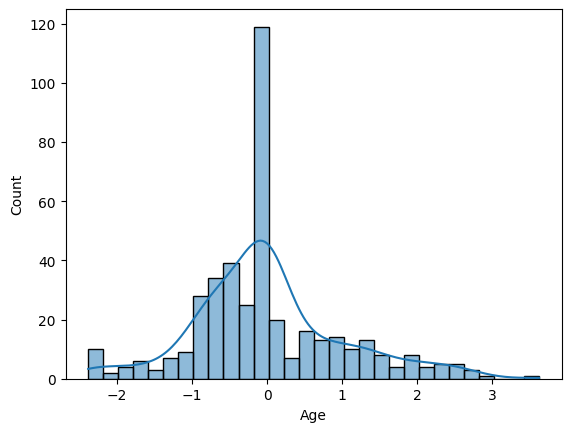

In [97]:
sns.histplot(data['Age'], bins=30, kde=True);

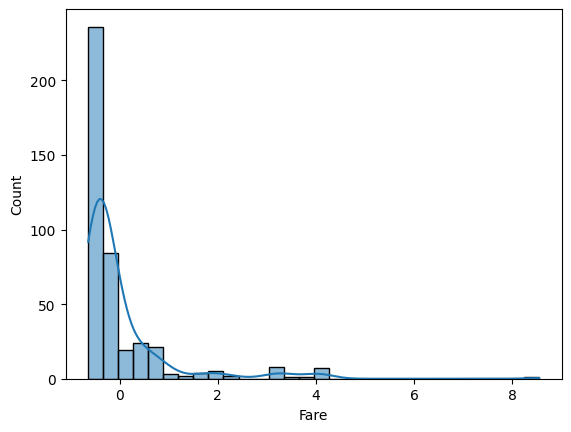

In [98]:
sns.histplot(data['Fare'], bins=30, kde=True);

In [99]:
data[numeric_features].describe()

,Age,Fare
count,4.180000e+02,4.180000e+02
mean,1.317394e-16,-5.099589e-17
std,1.001198e+00,1.001198e+00
min,-2.385419e+00,-6.377637e-01
25%,-5.763018e-01,-4.962194e-01
50%,0.000000e+00,-3.786501e-01
75%,4.340463e-01,-7.358230e-02
max,3.623577e+00,8.546519e+00
